<a href="https://colab.research.google.com/github/DanielCataneo/Pyhton-Data-Analist-Projects/blob/main/SalesAnalistProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import pandas as pd
import datetime
import matplotlib.pyplot as plt

produtos = list()
vendas = list()

try:
# Pega os dados do arquivo Produtos.txt e os adiciona em uma lista produtos()
  def Produtos(nomeP):
    try:
      with open(nomeP , 'r') as y:
        for linha in y:
          z = linha.strip().split(',') # usando strip para evitar que espaços em branco nos arquivos atrapalhem a
          # formatação das tabelas
          # Pega os dados separados pelo split e cria variáveis dentro do programa
          ID_Produto = int(z[0].strip())
          Nome_Produto = z[1].strip()
          Preco_Produto = float(z[2].strip())
          produtos.append([ID_Produto , Nome_Produto,  Preco_Produto])
          # Tratamento de exceções dentro de cada função para facilitar ao usuário o entendimento de algo que deu errado
    except FileNotFoundError:
      print("O Arquivo Produtos não foi encontrado.")
      raise
    except ValueError:
      print("""Houve erro na conversão de algum dos valores dentro dos arquivos verifique se
      os dados estão dispostos na ordem correta: ID_Produto,Nome_Produto,Preço_Produto""")
      raise

# Pega os dados do arquivo Vendas.txt e os adiciona a lista vendas()
  def Vendas(nomeV):
    try:
      with open(nomeV , 'r') as y:
        for linha in y:
          z = linha.strip().split(',')
          # Separa as informações do arquivo por meio da ',' e insere no vetor z
          ID_Produto = int(z[0].strip())
          QTD = int(z[1])
          Data = z[2].strip()
          vendas.append([ID_Produto , QTD , Data])
    except FileNotFoundError:
      print("O Arquivo Vendas não foi encontrado.")
      raise
    except ValueError:
      print("""Houve erro na conversão de algum dos valores dentro dos arquivos verifique se os dados estão dispostos
       na ordem correta: ID_Produto,Quantidade,Data(yyyy-MM-dd)""")
      raise

  # Caminho do arquivo mais chamada da função
  # /content/Produtos.txt
  nomeP = input('Digite o caminho do arquivo que contém os Produtos: ')
  Produtos(nomeP)

  # /content/Vendas.txt
  nomeV = input('Digite o caminho do arquivo que contém as Vendas: ')
  Vendas(nomeV)

  # Configuração das colunas da tabela Produtos
  colunasP = ['ID' , 'Produto' , 'Preço (R$)']
  print('\nPRODUTOS')
  dFprodutos = pd.DataFrame(produtos , columns=colunasP)
  print(dFprodutos)

  # Configuração das colunas da tabela Vendas
  colunasV = ['ID', 'Quantidade', 'Data']
  print('\nVENDAS')
  dFvendas = pd.DataFrame(vendas, columns=colunasV)
  dFvendas['Data'] = pd.to_datetime(dFvendas['Data']).dt.strftime('%d/%m/%Y')
  print(dFvendas)

except:
  print("Programa encerrado")


Digite o caminho do arquivo que contém os Produtos: /content/Produtos.txt
Digite o caminho do arquivo que contém as Vendas: /content/Vendas.txt

PRODUTOS
    ID           Produto  Preço (R$)
0    1             Arroz        5.50
1    2            Feijão        7.20
2    3          Macarrão        4.00
3    4            Azeite       15.00
4    5              Café        8.30
5    6            Açúcar        3.80
6    7               Sal        2.10
7    8             Leite        4.50
8    9          Biscoito        3.00
9   10           Farinha        6.25
10  11   Molho de Tomate        2.75
11  12      Batata Palha        5.80
12  13      Óleo de Soja        7.50
13  14   Milho de Pipoca        3.40
14  15           Ervilha        4.60
15  16       Milho Verde        4.00
16  17              Atum        8.90
17  18          Sardinha        6.50
18  19  Leite Condensado        4.90
19  20    Creme de Leite        3.30
20  21      Achocolatado        7.80
21  22          Chá Mate        

In [ ]:
# Unir as tabelas pelo ID do produto para facilitar a vizualização pelo cliente
dfUniao = pd.merge(dFprodutos, dFvendas, on='ID', how='inner')

# Calcular o valor total de produtos na data x
dfUniao['Valor Total (R$)'] = dfUniao['Preço (R$)'] * dfUniao['Quantidade']

print('\tTabela Vendas dos Produtos')
print(dfUniao)

	Tabela Vendas dos Produtos
    ID           Produto  Preço (R$)  Quantidade        Data  Valor Total (R$)
0    1             Arroz        5.50           7  22/11/2024             38.50
1    1             Arroz        5.50           4  23/11/2024             22.00
2    1             Arroz        5.50           6  30/11/2024             33.00
3    2            Feijão        7.20           2  07/11/2024             14.40
4    3          Macarrão        4.00          10  02/11/2024             40.00
5    3          Macarrão        4.00           5  05/11/2024             20.00
6    4            Azeite       15.00           3  11/11/2024             45.00
7    4            Azeite       15.00           2  09/11/2024             30.00
8    5              Café        8.30           3  26/11/2024             24.90
9    5              Café        8.30           4  06/11/2024             33.20
10   6            Açúcar        3.80           8  19/11/2024             30.40
11   6            Açúcar

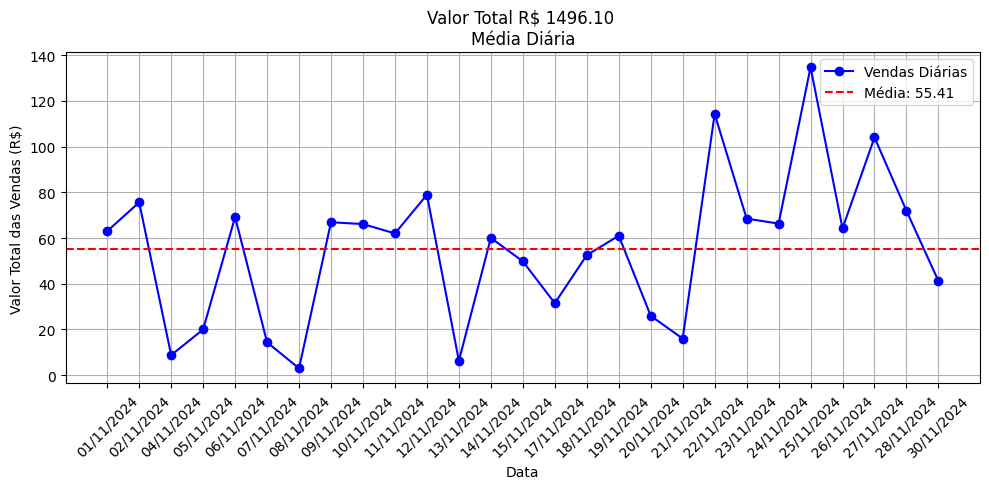

In [ ]:
# Agrupar por data e somar os valores totais de cada data quando há datas iguais para serem plotados no gráfico depois
dfValorTotalData = dfUniao.groupby('Data')['Valor Total (R$)'].sum().reset_index()
mediaVT = dfValorTotalData['Valor Total (R$)'].mean()
VendasTotais = dfUniao['Valor Total (R$)'].sum()

# Gerar o gráfico de vendas segmentado por vendas em datas
plt.figure(figsize=(10, 5))
plt.plot(dfValorTotalData['Data'], dfValorTotalData['Valor Total (R$)'], marker='o', color='b', label="Vendas Diárias" )
plt.axhline(mediaVT, color='r', linestyle='--', label=f"Média: {mediaVT:.2f}")
plt.title(f"Valor Total R$ {VendasTotais:.2f} \nMédia Diária")
plt.xlabel("Data")
plt.ylabel("Valor Total das Vendas (R$)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()